In [6]:
import csv
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import torch

import dask.array as da
import dask.dataframe as dd

import os

In [7]:
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rcParams.update({'font.size': 16})

In [10]:
def display_confidence_stats(base_dir: str, dataset: str, model_name: str)-> None:
    # teacher train
    display(f'{dataset} Train')
    data_dir =f".\\_eval_output\\{base_dir}\\{dataset}_on_train"
    fname = os.path.join(data_dir, "eval_results.csv")
    df = dd.read_csv(fname)
    df_baseline_train = pd.read_csv(fname)
    accuracy = len(df[df['pred']==df['label']])/len(df['pred'])
    df_correct = df[df['pred']==df['label']]
    display('------------------------------')
    print(f"B: ")
    print(f"    {base_dir}")
    print(f'    accuracy = {accuracy}')
    f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(6,18))
    sns.distplot(df_correct[['p0','p1']].compute(), bins=np.linspace(0, 1, num=20), color='darkcyan', ax=ax1).set(title='Confidence distribution, $B$')
    ax1.set_ylim([0,7])
    ax1.grid(True)

    # student train
    data_dir = f".\\_eval_output\\{model_name}\\{dataset}_on_train"
    fname = os.path.join(data_dir, "eval_results.csv")
    df = dd.read_csv(fname)
    df_distill_train = pd.read_csv(fname)
    accuracy = len(df[df['pred']==df['label']])/len(df['pred'])
    df_correct = df[df['pred']==df['label']]
    print(f"S:")
    print(f"    {model_name}")
    print(f'    accuracy = {accuracy}')
    sns.distplot(df_correct[['p0','p1']].compute(), bins=np.linspace(0, 1, num=20), color='darkcyan', ax=ax2).set(title='Confidence distribution, $S$')
    ax2.set_ylim([0,7])
    ax2.grid(True)
    
    # teacher vs student train
    df_baseline_train.columns = ['pred_baseline', 'p0_baseline', 'p1_baseline', 'label']
    df_distill_train.columns = ['pred_distill', 'p0_distill', 'p1_distill', 'label_']
    _ = pd.concat([df_baseline_train, df_distill_train], axis=1)
    _correct = _[(_.pred_baseline == _.label) & (_.pred_distill == _.label)]
    delta_confidence_p0_train = _correct.p0_baseline - _correct.p0_distill
    print(f"B vs S:")
    print(f"    Sigma confidence delta: {np.std(delta_confidence_p0_train)}")


    display('------------------------------')
    # teacher eval
    display(f'{dataset} Eval')
    data_dir =f".\\_eval_output\\{base_dir}\\{dataset}_on_eval"
    fname = os.path.join(data_dir, "eval_results.csv")
    df = dd.read_csv(fname)
    accuracy = len(df[df['pred']==df['label']])/len(df['pred'])
    df_correct = df[df['pred']==df['label']]
    df_baseline_eval = pd.read_csv(fname)
    print(f"B: ")
    print(f"    {base_dir}")
    print(f"    accuracy = {accuracy}")


    # student eval
    data_dir = f".\\_eval_output\\{model_name}\\{dataset}_on_eval"
    fname = os.path.join(data_dir, "eval_results.csv")
    df = dd.read_csv(fname)
    accuracy = len(df[df['pred']==df['label']])/len(df['pred'])
    df_correct = df[df['pred']==df['label']]
    df_distill_eval = pd.read_csv(fname)
    print(f"S: ")
    print(f"    {model_name}")
    print(f'    accuracy = {accuracy}')

    # teacher vs student eval
    df_baseline_eval.columns = ['pred_baseline', 'p0_baseline', 'p1_baseline', 'label']
    df_distill_eval.columns = ['pred_distill', 'p0_distill', 'p1_distill', 'label_']
    _ = pd.concat([df_baseline_eval, df_distill_eval], axis=1)
    _correct = _[(_.pred_baseline == _.label) & (_.pred_distill == _.label)]
    delta_confidence_p0_eval = _correct.p0_baseline - _correct.p0_distill
    print(f"B vs S: ")
    print(f"    Sigma confidence delta: {np.std(delta_confidence_p0_eval)}")

    display('------------------------------')

    sns.distplot(delta_confidence_p0_train,  color='tab:blue', ax=ax3) 
    ax3.set_title('Distirbution of $\Delta_{Conf}$')
    ax3.set_ylim([0,60])
    plt.xlim([-0.15,0.15])
    # ax1.set_xlim([-0.03,0.03])

    ax3.grid(True)
    plt.show()

# SST-2 task

'SST-2 Train'

'------------------------------'

B: 
    bert-base-uncased-finetuned-sst2
    accuracy = 0.9841126074626201
S:
    TinyBERT_6L_768D
    accuracy = 0.9784406598464713
B vs S:
    Sigma confidence delta: 0.03127477112207867


'------------------------------'

'SST-2 Eval'

B: 
    bert-base-uncased-finetuned-sst2
    accuracy = 0.930045871559633
S: 
    TinyBERT_6L_768D
    accuracy = 0.9277522935779816
B vs S: 
    Sigma confidence delta: 0.06810524119474262


'------------------------------'

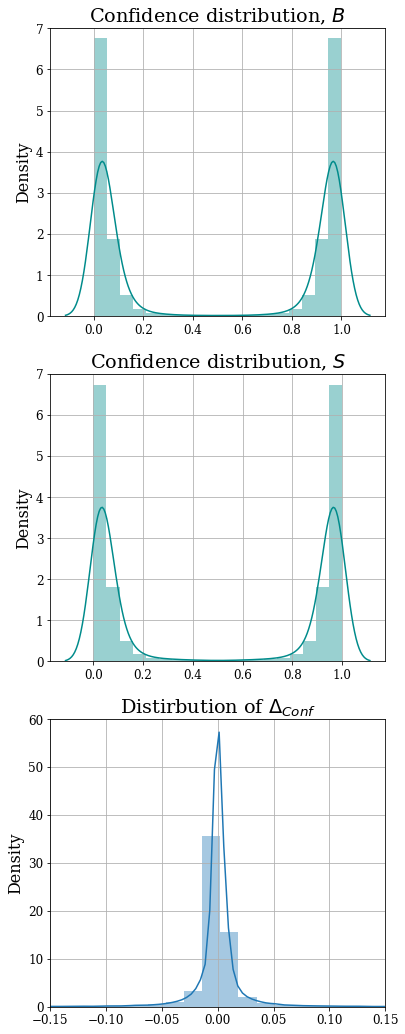

In [12]:
base_dir = "bert-base-uncased-finetuned-sst2"
dataset = "SST-2"
student_model_name = "TinyBERT_6L_768D"
display_confidence_stats(base_dir, dataset, student_model_name)

# RTE task

'RTE Train'

'------------------------------'

B: 
    bert-base-uncased-rte
    accuracy = 0.9481927710843373
S:
    TinyBERT_6L_768D
    accuracy = 0.87429718875502
B vs S:
    Sigma confidence delta: 0.07587748945540529


'------------------------------'

'RTE Eval'

B: 
    bert-base-uncased-rte
    accuracy = 0.6534296028880866
S: 
    TinyBERT_6L_768D
    accuracy = 0.7003610108303249
B vs S: 
    Sigma confidence delta: 0.10202934748693045


'------------------------------'

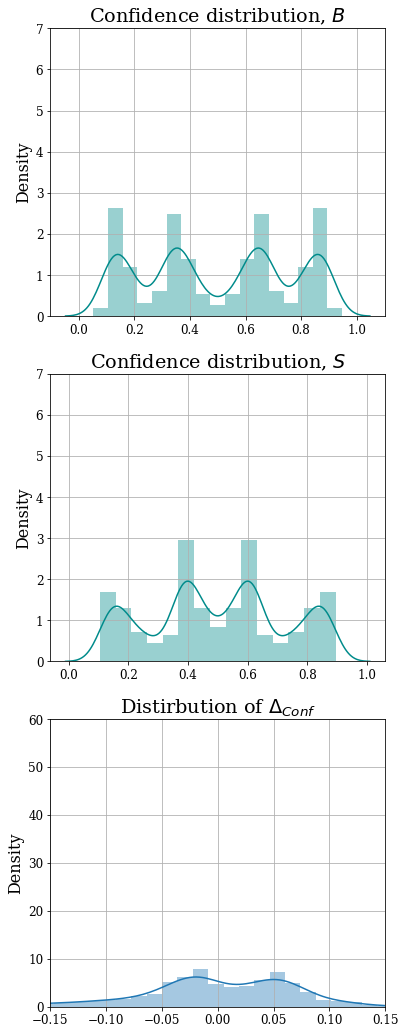

In [14]:
base_dir = "bert-base-uncased-rte"
dataset = "RTE"
student_model_name = "TinyBERT_6L_768D"
display_confidence_stats(base_dir, dataset, student_model_name)

# QQP task

'QQP Train'

'------------------------------'

B: 
    bert-base-uncased-QQP
    accuracy = 0.9685471325780688
S:
    TinyBERT_6L_768D
    accuracy = 0.9547665770683201
B vs S:
    Sigma confidence delta: 0.04556781146172517


'------------------------------'

'QQP Eval'

B: 
    bert-base-uncased-QQP
    accuracy = 0.9071481573089291
S: 
    TinyBERT_6L_768D
    accuracy = 0.909967845659164
B vs S: 
    Sigma confidence delta: 0.053146612520784314


'------------------------------'

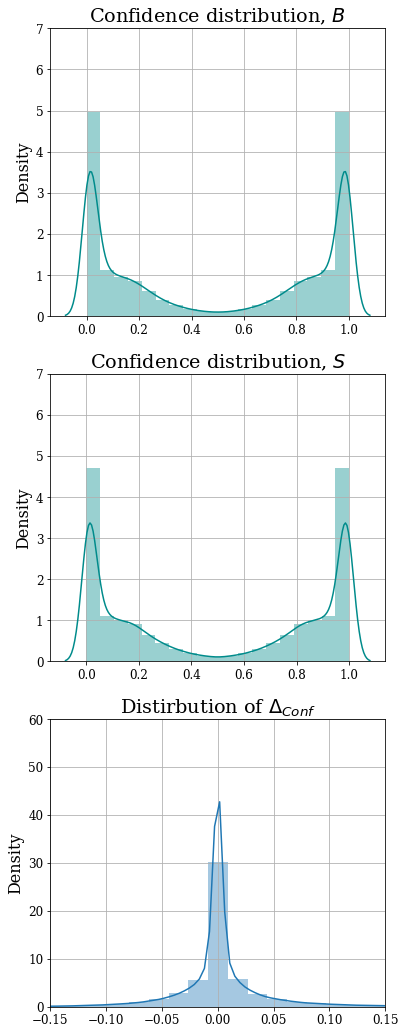

In [15]:
base_dir = "bert-base-uncased-QQP"
dataset = "QQP"
student_model_name = "TinyBERT_6L_768D"
display_confidence_stats(base_dir, dataset, student_model_name)

# QNLI task

'QNLI Train'

'------------------------------'

B: 
    bert-base-uncased-QNLI
    accuracy = 0.9755783202696123
S:
    TinyBERT_6L_768D
    accuracy = 0.9586034388932912
B vs S:
    Sigma confidence delta: 0.05142790770135963


'------------------------------'

'QNLI Eval'

B: 
    bert-base-uncased-QNLI
    accuracy = 0.9136005857587406
S: 
    TinyBERT_6L_768D
    accuracy = 0.9119531393007505
B vs S: 
    Sigma confidence delta: 0.06741836892195309


'------------------------------'

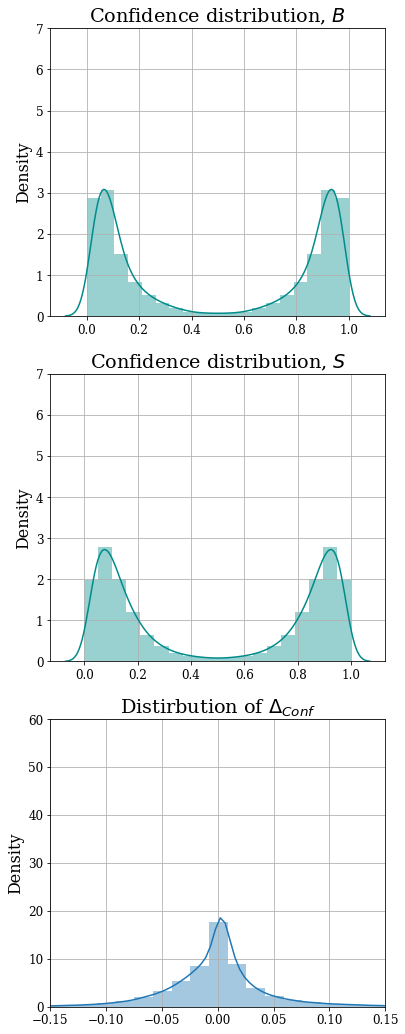

In [16]:
base_dir = "bert-base-uncased-QNLI"
dataset = "QNLI"
student_model_name = "TinyBERT_6L_768D"
display_confidence_stats(base_dir, dataset, student_model_name)

# MRPC

'MRPC Train'

'------------------------------'

B: 
    bert-base-uncased-finetuned-mrpc
    accuracy = 0.811886586695747
S:
    TinyBERT_6L_768D
    accuracy = 0.8026172300981461
B vs S:
    Sigma confidence delta: 0.06042013296230734


'------------------------------'

'MRPC Eval'

B: 
    bert-base-uncased-finetuned-mrpc
    accuracy = 0.7867647058823529
S: 
    TinyBERT_6L_768D
    accuracy = 0.8014705882352942
B vs S: 
    Sigma confidence delta: 0.07397358412163323


'------------------------------'

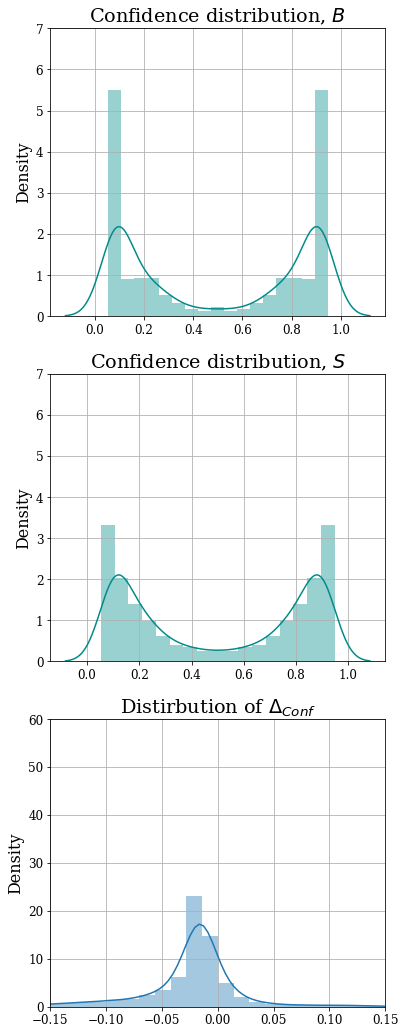

In [17]:
base_dir = "bert-base-uncased-finetuned-mrpc"
dataset = "MRPC"
student_model_name = "TinyBERT_6L_768D"
display_confidence_stats(base_dir, dataset, student_model_name)